In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, f1_score, recall_score, accuracy_score


from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

#changing the working directory
%cd /content/gdrive/My Drive/kaggle

/content/gdrive/My Drive/kaggle


In [ ]:
!kaggle datasets download -d roshansharma/online-shoppers-intention
!unzip \*.zip  && rm *.zip

  0% 0.00/252k [00:00<?, ?B/s]
100% 252k/252k [00:00<00:00, 16.6MB/s]
Archive:  online-shoppers-intention.zip
replace online_shoppers_intention.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: online_shoppers_intention.csv  


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/kaggle/online_shoppers_intention.csv')
df['Administrative_Duration']=df['Administrative_Duration'].fillna(df['Administrative_Duration'].median())
df['Administrative']=df['Administrative'].fillna(df['Administrative'].median())
df['Informational']=df['Informational'].fillna(df['Informational'].median())
df['Informational_Duration']=df['Informational_Duration'].fillna(df['Informational_Duration'].median())
df['ProductRelated']=df['ProductRelated'].fillna(df['ProductRelated'].median())
df['ProductRelated_Duration']=df['ProductRelated_Duration'].fillna(df['ProductRelated_Duration'].median())
df['BounceRates']=df['BounceRates'].fillna(df['BounceRates'].median())
df['ExitRates']=df['ExitRates'].fillna(df['ExitRates'].median())
df['Revenue']=df['Revenue'].map({True: 1, False: 0})
df=pd.get_dummies(df,drop_first=True)

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,False,0,0,1,0,0,0,0,0,0,0,0,1
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,False,0,0,1,0,0,0,0,0,0,0,0,1
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,4,1,9,3,False,0,0,1,0,0,0,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,False,0,0,1,0,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,True,0,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.316302,80.823396,0.503406,34.467207,31.748256,1195.360026,0.022131,0.042982,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,0.154745,0.140065,0.014923,0.035036,0.023358,0.154663,0.272830,0.243147,0.044526,0.036334,0.006894,0.855718
std,3.321163,176.777041,1.270093,140.750298,44.467488,1913.390668,0.048404,0.048503,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,0.361676,0.347068,0.121250,0.183880,0.151043,0.361598,0.445432,0.429000,0.206268,0.187128,0.082745,0.351390
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.287500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016667,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
neg_admin_dur = df[df['Administrative_Duration'] < 0]
neg_info_dur = df[df['Informational_Duration'] < 0]
neg_product_dur = df[df['ProductRelated_Duration'] < 0]
#len(neg_admin_dur)
#len(neg_info_dur)
len(neg_product_dur)

33

In [ ]:
df = df.drop(df[df['Administrative_Duration'] < 0].index)
df = df.drop(df[df['Informational_Duration'] < 0].index)
df = df.drop(df[df['ProductRelated_Duration'] < 0].index)
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
count,12297.000000,12297.000000,12297.000000,12297.000000,12297.000000,12297.000000,12297.000000,12297.000000,12297.000000,12297.000000,12297.000000,12297.000000,12297.000000,12297.000000,12297.000000,12297.000000,12297.000000,12297.000000,12297.000000,12297.000000,12297.000000,12297.000000,12297.000000,12297.000000,12297.000000,12297.000000
mean,2.322355,81.042975,0.504757,34.562386,31.830772,1198.570555,0.021702,0.042591,5.905062,0.061462,2.124177,2.356510,3.146458,4.071074,0.155160,0.140441,0.013906,0.035049,0.023420,0.154265,0.273075,0.243555,0.044645,0.036432,0.006912,0.855331
std,3.323535,176.963202,1.271528,140.927035,44.498541,1914.951133,0.047663,0.047940,18.590827,0.199019,0.911476,1.716511,2.401360,4.026000,0.362072,0.347458,0.117105,0.183912,0.151241,0.361218,0.445557,0.429245,0.206532,0.187369,0.082856,0.351782
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,188.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,601.768182,0.003093,0.025022,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,93.750000,0.000000,0.000000,38.000000,1470.333333,0.016667,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_num=df[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues']]
scaler = StandardScaler()
scaler.fit(df_num)
df[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues']]=scaler.transform(df_num)

Text(0, 0.5, '')

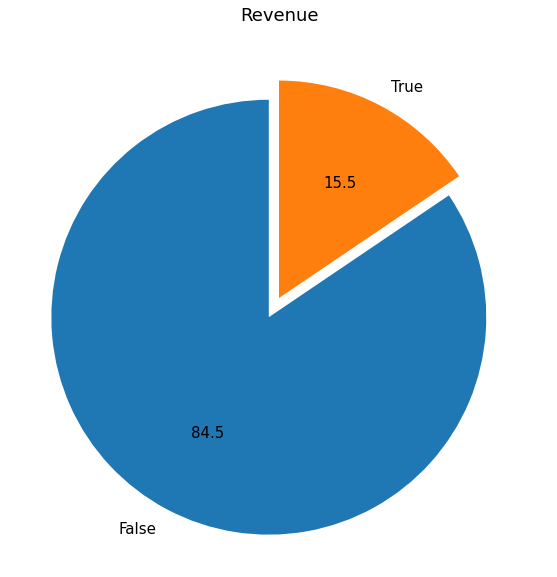

In [ ]:
plt.figure(figsize=(10,10))
df['Revenue'].value_counts().plot(kind='pie',autopct='%1.1f', textprops={'fontsize': 15},startangle=90,explode =(0.1,0))
plt.title('Revenue', fontsize = 18)
plt.ylabel('')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

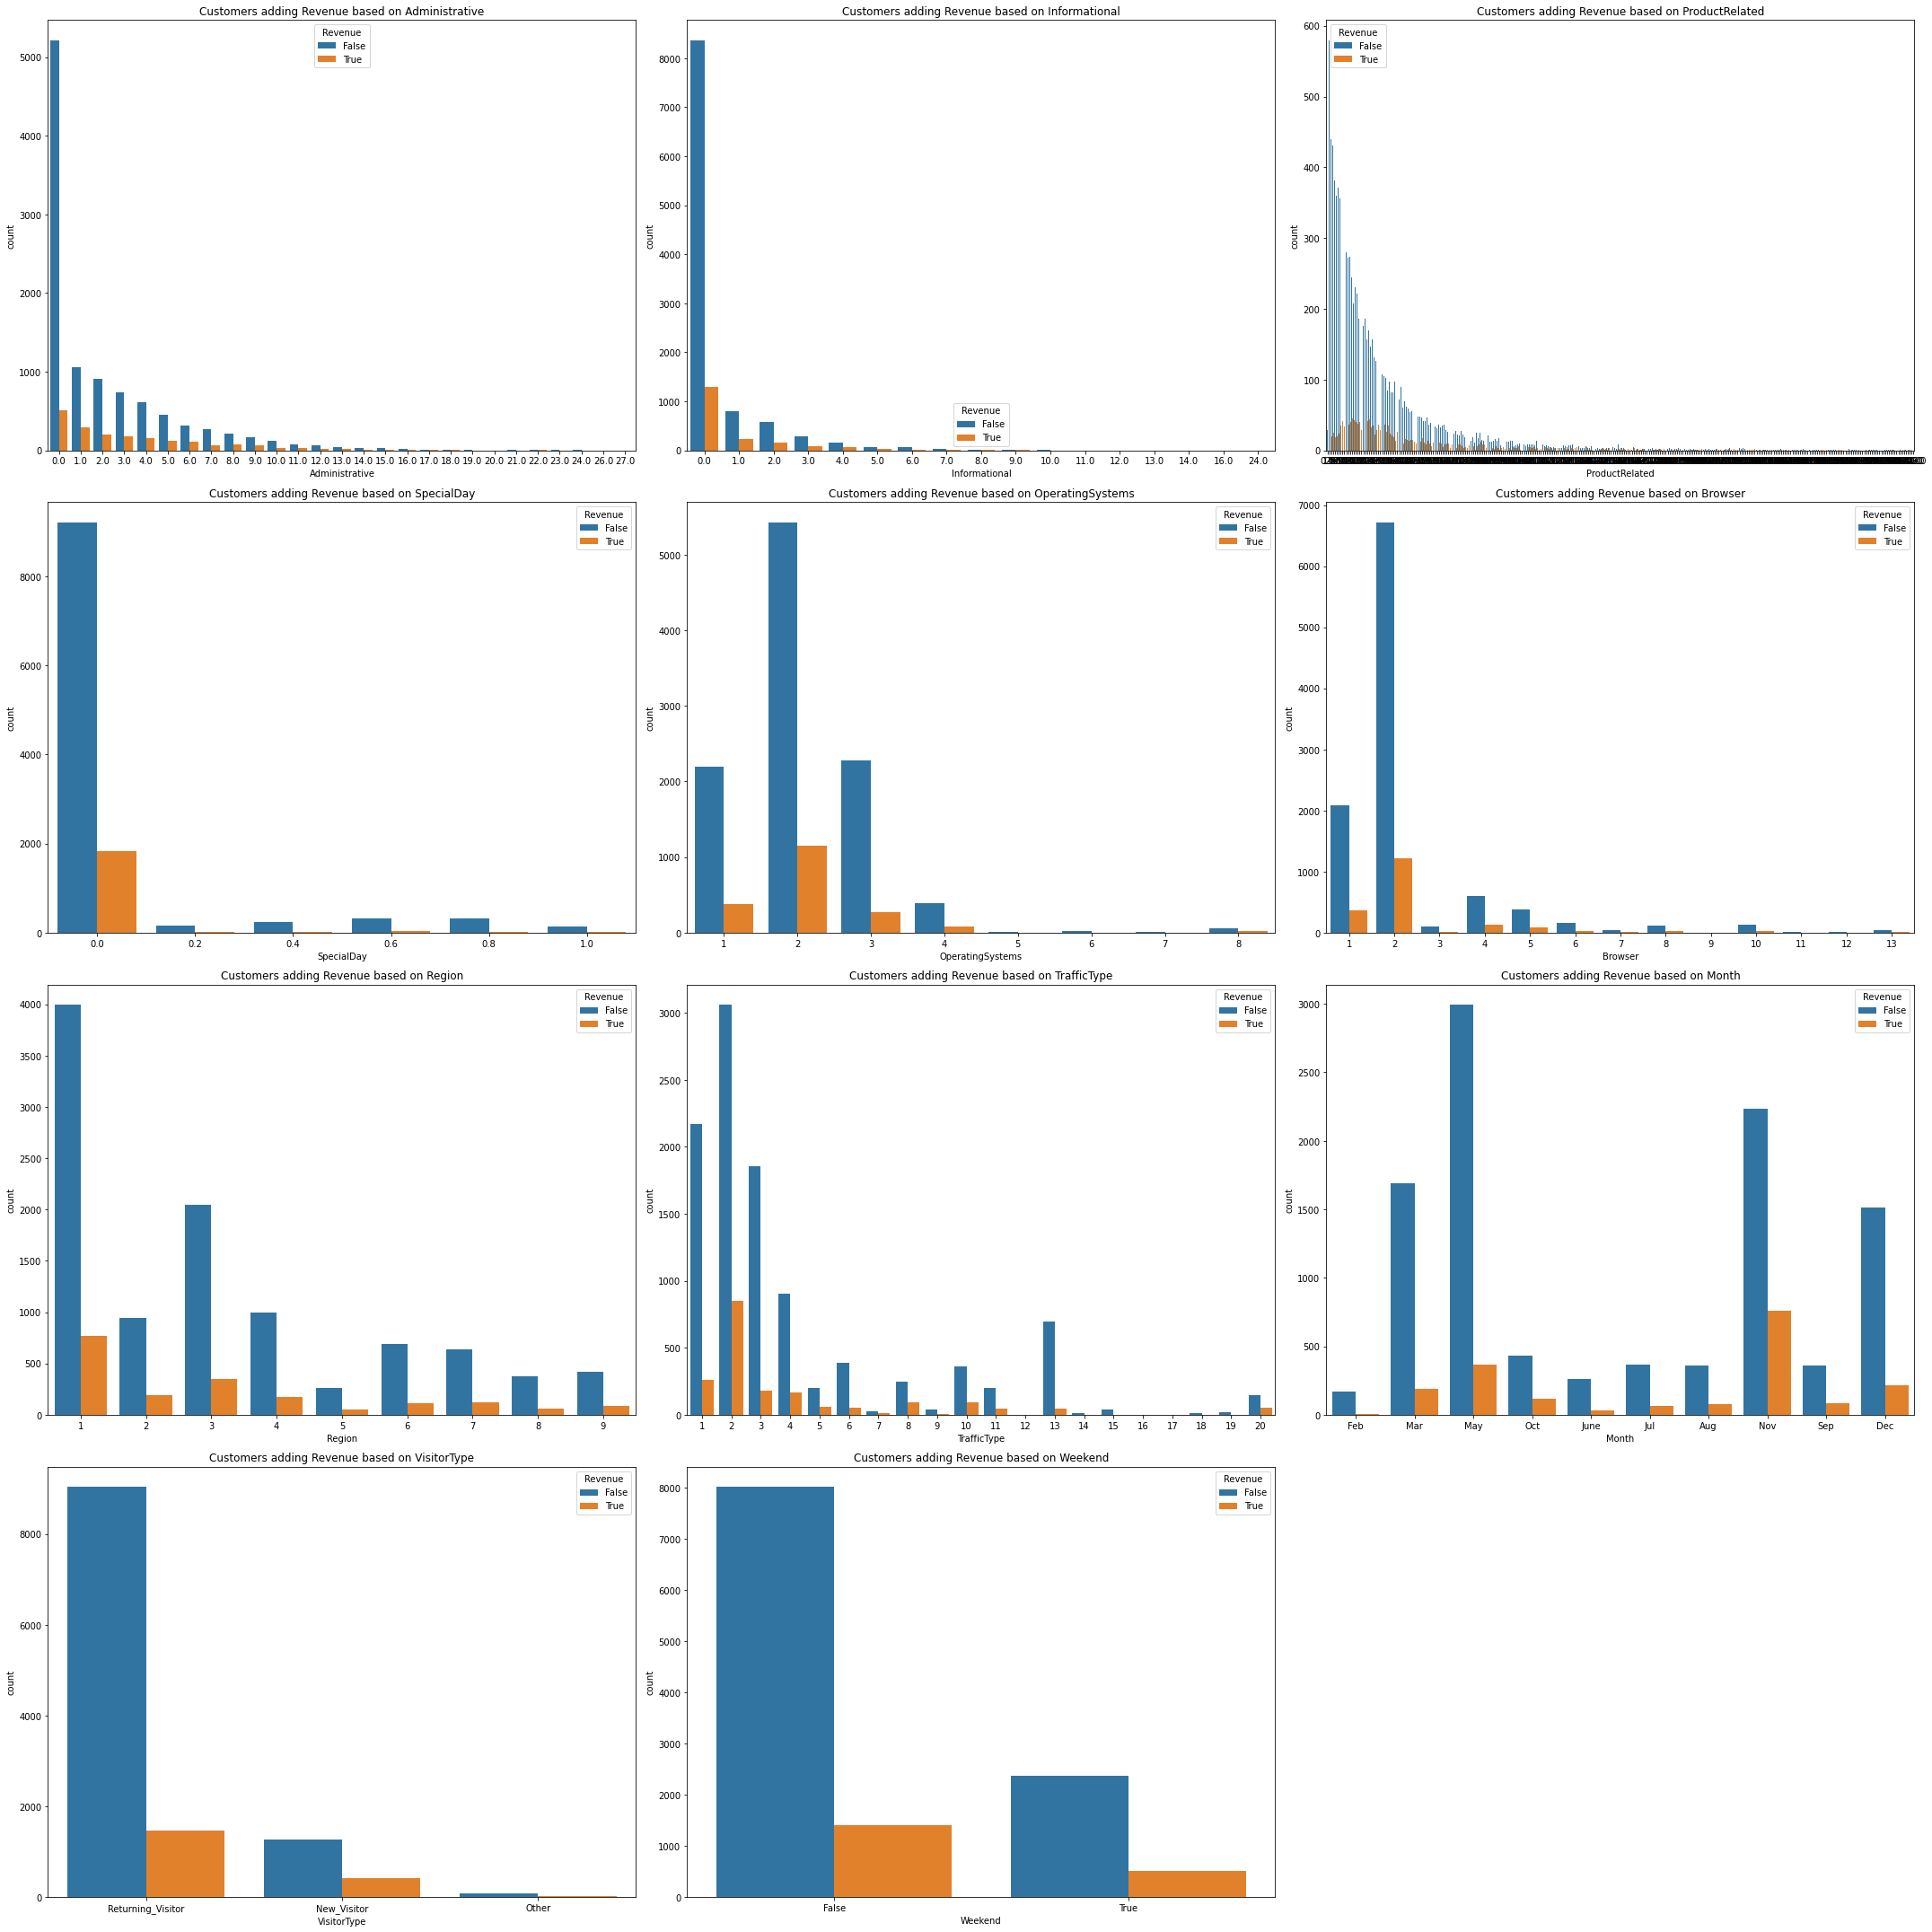

In [ ]:
cols=['Administrative','Informational','ProductRelated','SpecialDay','OperatingSystems','Browser','Region','TrafficType','Month','VisitorType','Weekend']    
plt.figure(figsize=(30,30))
plot_number = 0
for i in cols:
    plot_number = plot_number + 1
    ax = plt.subplot(4, 3, plot_number,adjustable='datalim')
    sns.countplot(df[i],hue=df['Revenue'])
    ax.set_title('Customers adding Revenue based on '+ i,fontdict=None)
    plt.tight_layout()

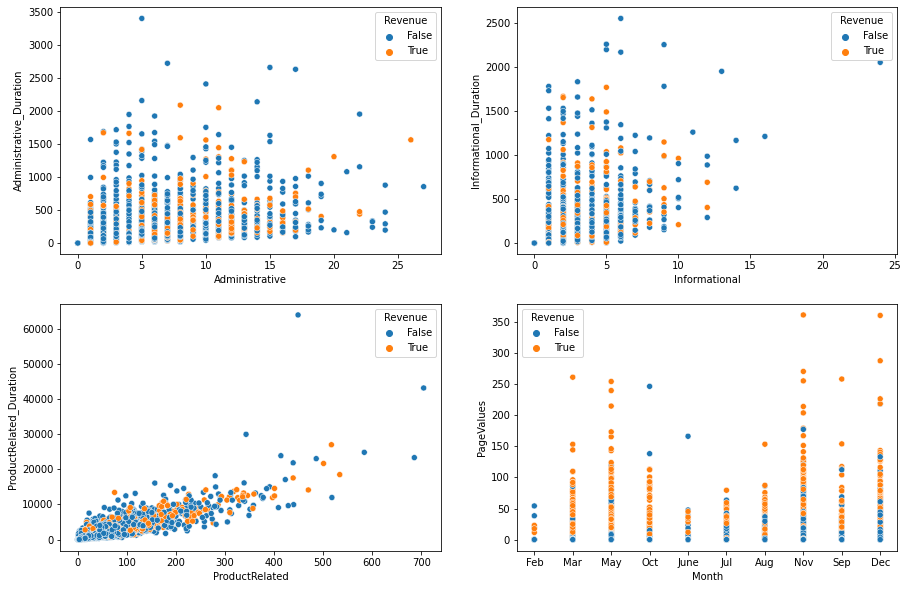

In [ ]:
plt.figure(figsize = (15, 10))
plt.subplot(221)
sns.scatterplot(x="Administrative", y="Administrative_Duration",hue="Revenue", data=df)
plt.subplot(222)
sns.scatterplot(x="Informational", y="Informational_Duration",hue="Revenue", data=df)
plt.subplot(223)
sns.scatterplot(x="ProductRelated", y="ProductRelated_Duration",hue="Revenue", data=df)
plt.subplot(224)
sns.scatterplot(x="Month", y="PageValues",hue="Revenue", data=df)

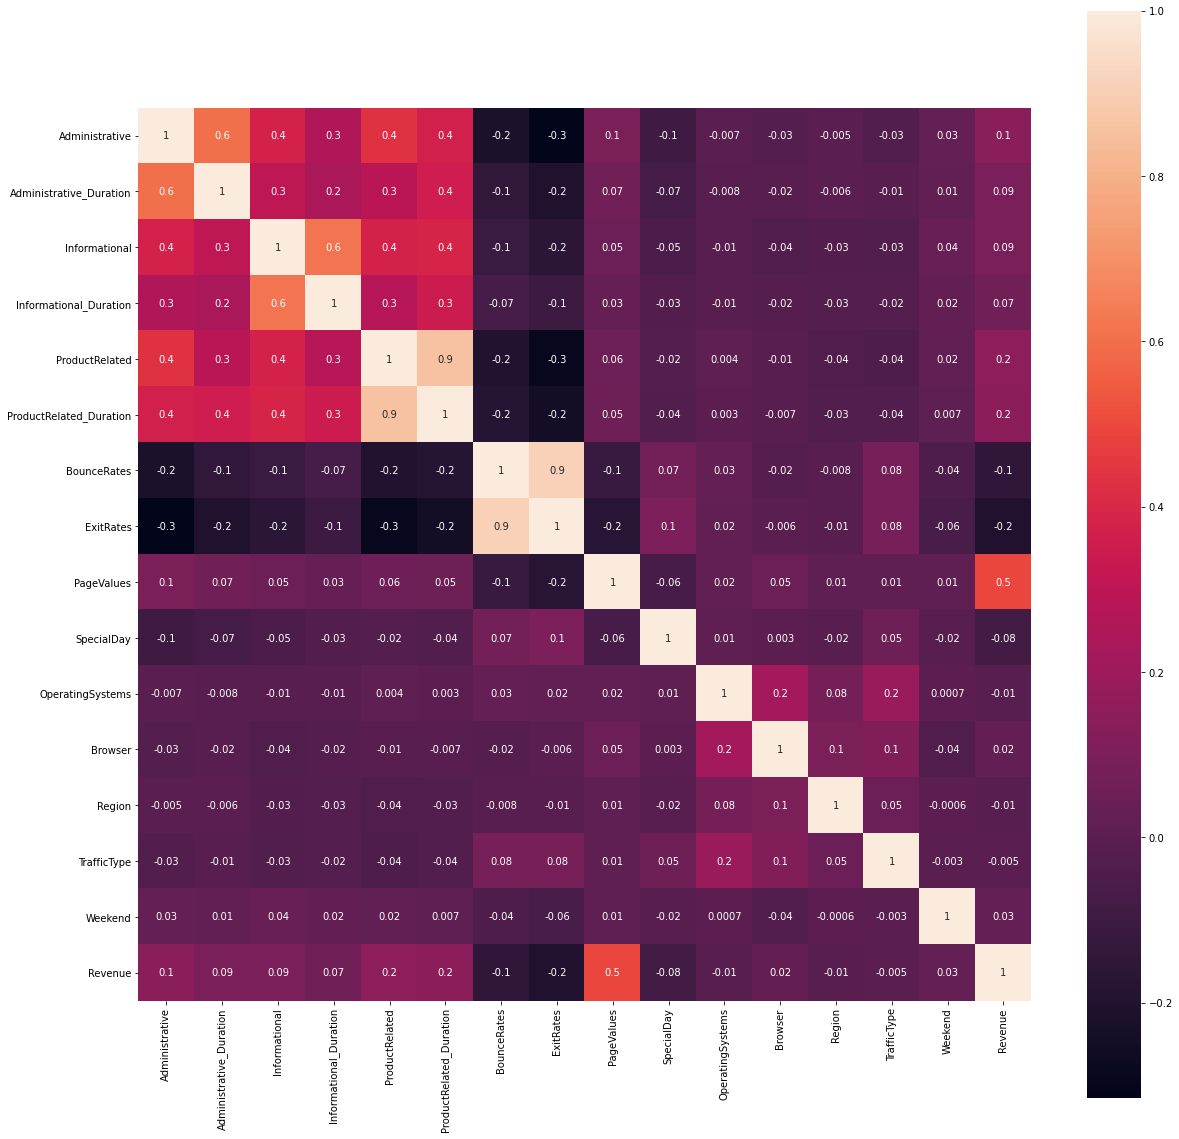

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt='.1g',square=True)

Text(0.5, 1.0, 'PageValues')

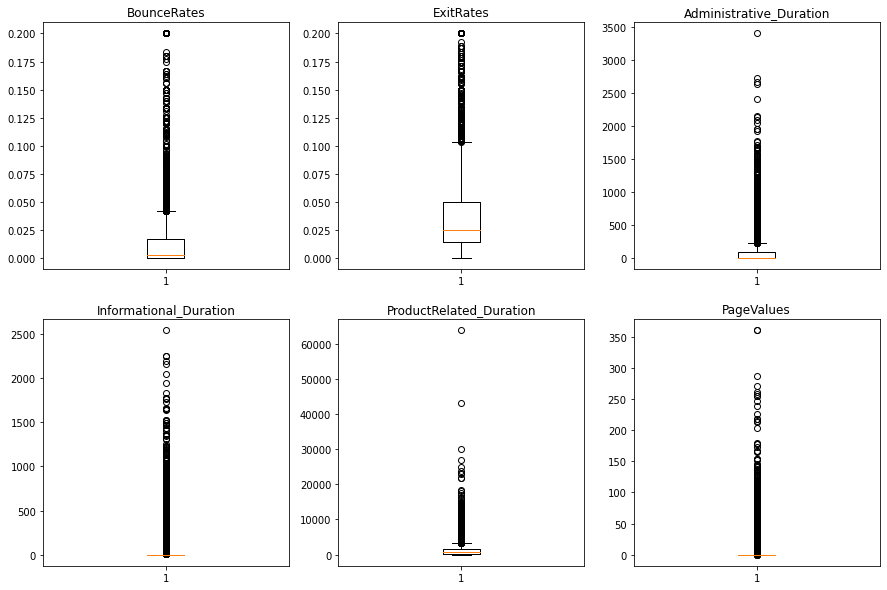

In [ ]:
#Visualizing Outliers
features=df.copy()
plt.figure(figsize = (15, 10))
ax=plt.subplot(231)
plt.boxplot(features['BounceRates'])
ax.set_title('BounceRates')
ax=plt.subplot(232)
plt.boxplot(features['ExitRates'])
ax.set_title('ExitRates')
ax=plt.subplot(233)
plt.boxplot(features['Administrative_Duration'])
ax.set_title('Administrative_Duration')
ax=plt.subplot(234)
plt.boxplot(features['Informational_Duration'])
ax.set_title('Informational_Duration')
ax=plt.subplot(235)
plt.boxplot(features['ProductRelated_Duration'])
ax.set_title('ProductRelated_Duration')
ax=plt.subplot(236)
plt.boxplot(features['PageValues'])
ax.set_title('PageValues')

Text(0.5, 1.0, 'ProductRelated_Duration')

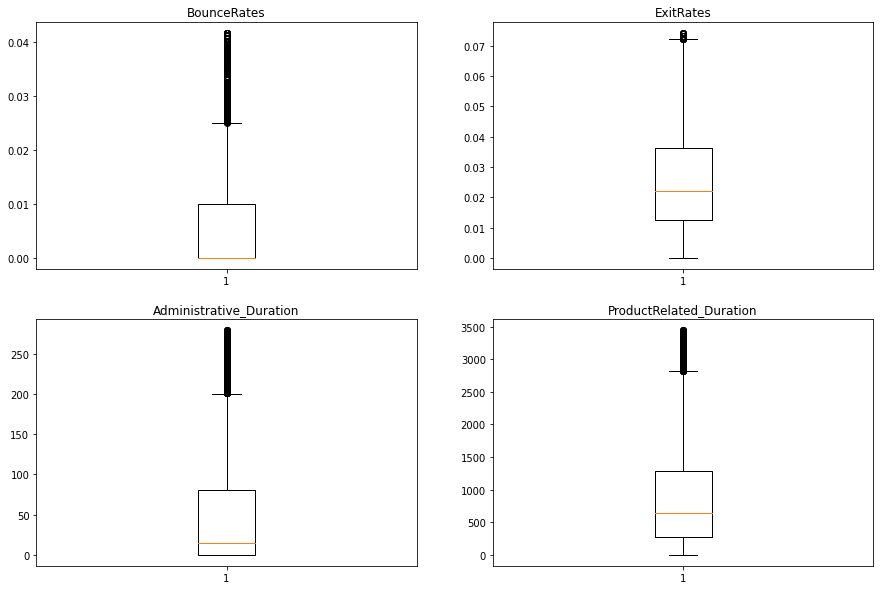

In [ ]:
numerical_features=['BounceRates','ExitRates','Administrative_Duration','ProductRelated_Duration']
for cols in numerical_features:
    Q1 = features[cols].quantile(0.25)
    Q3 = features[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (features[cols] >= Q1 - 1.5 * IQR) & (features[cols] <= Q3 + 1.5 *IQR)
    features=features.loc[filter]
    
plt.figure(figsize = (15, 10))
ax=plt.subplot(221)
plt.boxplot(features['BounceRates'])
ax.set_title('BounceRates')
ax=plt.subplot(222)
plt.boxplot(features['ExitRates'])
ax.set_title('ExitRates')
ax=plt.subplot(223)
plt.boxplot(features['Administrative_Duration'])
ax.set_title('Administrative_Duration')
ax=plt.subplot(224)
plt.boxplot(features['ProductRelated_Duration'])
ax.set_title('ProductRelated_Duration')

In [ ]:
features.loc[features['SpecialDay'] > 0.5, 'SpecialDay'] = 1
features.loc[features['SpecialDay'] < 0.5, 'SpecialDay'] = 0
features['SpecialDay'].value_counts()

0.0    8229
1.0     518
Name: SpecialDay, dtype: int64

In [ ]:
for cols in ['Administrative','Informational','ProductRelated','OperatingSystems','Browser',
             'Region','TrafficType','VisitorType']:
    features[cols] = features[cols].astype('category')

In [ ]:
from sklearn.preprocessing import StandardScaler

Categorical_variables=['Weekend','Revenue','Administrative','Informational','ProductRelated','SpecialDay',
                       'OperatingSystems','Browser','Region','Month','TrafficType','VisitorType']


feature_scale=[feature for feature in features.columns if feature not in Categorical_variables]


scaler=StandardScaler()
scaler.fit_transform(features[feature_scale])
features.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
9,0.0,0.0,0.0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.0,Feb,2,4,1,2,Returning_Visitor,False,False
10,0.0,0.0,0.0,0.0,3.0,395.000000,0.000000,0.066667,0.0,0.0,Feb,1,1,3,3,Returning_Visitor,False,False
11,0.0,0.0,0.0,0.0,16.0,407.750000,0.018750,0.025833,0.0,0.0,Feb,1,1,4,3,Returning_Visitor,False,False


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoded_features=['Month','VisitorType', 'Weekend', 'Revenue']

features_encoded = features.copy()
label_encoder = LabelEncoder()
for col in encoded_features:
    features_encoded[col] = label_encoder.fit_transform(features[col])
    
features_encoded.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,2,1,0
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,2,2,2,1,3,2,0,0
9,0.0,0.0,0.0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.0,2,2,4,1,2,2,0,0
10,0.0,0.0,0.0,0.0,3.0,395.000000,0.000000,0.066667,0.0,0.0,2,1,1,3,3,2,0,0
11,0.0,0.0,0.0,0.0,16.0,407.750000,0.018750,0.025833,0.0,0.0,2,1,1,4,3,2,0,0


In [ ]:
features_encoded['Revenue'].value_counts()

0    7302
1    1445
Name: Revenue, dtype: int64

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

X=features_encoded.drop(['Revenue'],axis=1)
y=features_encoded.Revenue

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

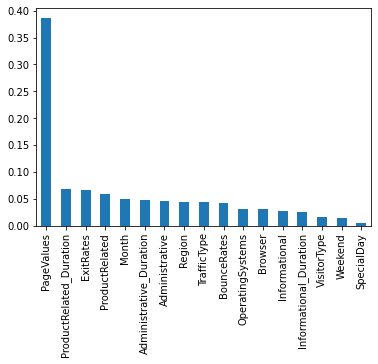

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='bar')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X=features_encoded.drop(['SpecialDay','VisitorType','Weekend','Informational_Duration','Informational','OperatingSystems','Browser','Revenue'],axis=1)
y=features_encoded.Revenue

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)


Input Training: (6997, 10)
Input Test: (1750, 10)
Output Training: (6997,)
Output Test: (1750,)


In [ ]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority',random_state=1)

X_train_sampled,y_train_sampled=smote.fit_sample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
pd.Series(y_train_sampled).value_counts()

1    5834
0    5834
dtype: int64

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf_parameters = {"n_estimators": [10, 100, 1000],
                 "max_depth":[5,8,15,25,30,None],
                 "min_samples_leaf":[1,2,5,10,15,100],
                 "max_leaf_nodes": [2, 5,10]}
rf_research1 = RandomizedSearchCV(rf, rf_parameters, cv=10, n_jobs=-1, random_state=0)
rf_research1.fit(X_train,y_train)
print("The mean accuracy of the model is:",rf_research1.score(X_test,y_test))

The mean accuracy of the model is: 0.9017142857142857


In [ ]:
print("The mean accuracy of the model is:",rf_research1.score(X_train,y_train))
print("The precision of the model is:", precision_score(rf_research1.predict(X_test), y_test))
print("The recall of the model is:", recall_score(rf_research1.predict(X_test), y_test))
print("The f1 score of the model is:", f1_score(rf_research1.predict(X_test), y_test))

The mean accuracy of the model is: 0.9086751464913534
The precision of the model is: 0.5531914893617021
The recall of the model is: 0.7722772277227723
The f1 score of the model is: 0.6446280991735538


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf_parameters = {"n_estimators": [10, 100, 1000],
                 "max_depth":[5,8,15,25,30,None],
                 "min_samples_leaf":[1,2,5,10,15,100],
                 "max_leaf_nodes": [2, 5,10]}
rf_research = RandomizedSearchCV(rf, rf_parameters, cv=10, n_jobs=-1, random_state=0)
rf_research.fit(X_train_sampled,y_train_sampled)
print("The mean accuracy of the model is:",rf_research.score(X_test,y_test))

The mean accuracy of the model is: 0.88


In [ ]:
print("The mean accuracy of the model is:",rf_research.score(X_train_sampled,y_train_sampled))
print("The precision of the model is:", precision_score(rf_research.predict(X_test), y_test))
print("The recall of the model is:", recall_score(rf_research.predict(X_test), y_test))
print("The f1 score of the model is:", f1_score(rf_research.predict(X_test), y_test))

The mean accuracy of the model is: 0.902639698320192
The precision of the model is: 0.8049645390070922
The recall of the model is: 0.5942408376963351
The f1 score of the model is: 0.6837349397590361


In [ ]:
rf_research.best_params_

{'max_depth': 8,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 10,
 'n_estimators': 1000}

In [ ]:
rf_tunned=RandomForestClassifier(n_estimators= 1000,min_samples_leaf= 10,max_leaf_nodes= 10,max_depth= 8,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn=KNeighborsClassifier()

knn_params={'n_neighbors':range(5,10)}

knn_research=GridSearchCV(knn, knn_params, cv=10, n_jobs=-1)
knn_research.fit(X_train_sampled,y_train_sampled)

print("The mean accuracy of the model is:",knn_research.score(X_test,y_test))

The mean accuracy of the model is: 0.812


In [ ]:
print("The mean accuracy of the model is:",knn_research.score(X_train_sampled,y_train_sampled))

print("The precision of the model is:", precision_score(knn_research.predict(X_test), y_test))
print("The recall of the model is:", recall_score(knn_research.predict(X_test), y_test))
print("The f1 score of the model is:", f1_score(knn_research.predict(X_test), y_test))

The mean accuracy of the model is: 0.9222660267398012
The precision of the model is: 0.6170212765957447
The recall of the model is: 0.44050632911392407
The f1 score of the model is: 0.5140324963072379


In [ ]:
knn_research.best_params_

{'n_neighbors': 6}

In [ ]:
knn_tunned=KNeighborsClassifier(n_neighbors=6)

In [ ]:
from sklearn.svm import SVC

sv=SVC(random_state=0)
sv_params = {'C': [0.1, 1, 10, 100, 1000], 
          'degree': range(1,20),
          'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
          'kernel': ['rbf']} 

sv_research=RandomizedSearchCV(sv, sv_params, cv=10, n_jobs=-1, random_state=0)
sv_research.fit(X_train_sampled,y_train_sampled)
print("The mean accuracy of the model is:",sv_research.score(X_test,y_test))

The mean accuracy of the model is: 0.8257142857142857


In [ ]:
print("The mean accuracy of the model is:",sv_research.score(X_train_sampled,y_train_sampled))

print("The precision of the model is:", precision_score(sv_research.predict(X_test), y_test))
print("The recall of the model is:", recall_score(sv_research.predict(X_test), y_test))
print("The f1 score of the model is:", f1_score(sv_research.predict(X_test), y_test))

The mean accuracy of the model is: 0.9970003428179637
The precision of the model is: 0.475177304964539
The recall of the model is: 0.46048109965635736
The f1 score of the model is: 0.4677137870855148


In [ ]:
sv_research.best_params_

{'C': 1000, 'degree': 18, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
sv_tunned=SVC(C=10, kernel='rbf', degree=18, gamma=0.001, random_state=0)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB()
nb.fit(X_train, y_train)
print("The mean accuracy of the model is:",nb.score(X_test,y_test))

The mean accuracy of the model is: 0.8497142857142858


In [ ]:
print("The mean accuracy of the model is:",nb.score(X_train,y_train))

print("The precision of the model is:", precision_score(nb.predict(X_test), y_test))
print("The recall of the model is:", recall_score(nb.predict(X_test), y_test))
print("The f1 score of the model is:", f1_score(nb.predict(X_test), y_test))

The mean accuracy of the model is: 0.8516507074460483
The precision of the model is: 0.5567375886524822
The recall of the model is: 0.5322033898305085
The f1 score of the model is: 0.5441941074523398


In [ ]:
from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB()
nb.fit(X_train_sampled, y_train_sampled)
print("The mean accuracy of the model is:",nb.score(X_test,y_test))

The mean accuracy of the model is: 0.8754285714285714


In [ ]:
print("The mean accuracy of the model is:",nb.score(X_train_sampled,y_train_sampled))

print("The precision of the model is:", precision_score(nb.predict(X_test), y_test))
print("The recall of the model is:", recall_score(nb.predict(X_test), y_test))
print("The f1 score of the model is:", f1_score(nb.predict(X_test), y_test))

The mean accuracy of the model is: 0.9002399725745629
The precision of the model is: 0.7730496453900709
The recall of the model is: 0.5860215053763441
The f1 score of the model is: 0.6666666666666667


In [ ]:
nb_model=BernoulliNB()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=1)
gb.fit(X_train,y_train)
print("The mean accuracy of the model is:",gb.score(X_test,y_test))

The mean accuracy of the model is: 0.9034285714285715


In [ ]:
print("The mean accuracy of the model is:", gb.score(X_train,y_train))

print("The precision of the model is:", precision_score(gb.predict(X_test), y_test))
print("The recall of the model is:", recall_score(gb.predict(X_test), y_test))
print("The f1 score of the model is:", f1_score(gb.predict(X_test), y_test))

The mean accuracy of the model is: 0.9275403744461912
The precision of the model is: 0.6312056737588653
The recall of the model is: 0.7325102880658436
The f1 score of the model is: 0.6780952380952382


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=1)
gb.fit(X_train_sampled,y_train_sampled)
print("The mean accuracy of the model is:",gb.score(X_test,y_test))

The mean accuracy of the model is: 0.8982857142857142


In [ ]:
print("The mean accuracy of the model is:", gb.score(X_train_sampled,y_train_sampled))

print("The precision of the model is:", precision_score(gb.predict(X_test), y_test))
print("The recall of the model is:", recall_score(gb.predict(X_test), y_test))
print("The f1 score of the model is:", f1_score(gb.predict(X_test), y_test))

The mean accuracy of the model is: 0.9385498800137128
The precision of the model is: 0.75177304964539
The recall of the model is: 0.6625
The f1 score of the model is: 0.7043189368770764


In [ ]:
gb=GradientBoostingClassifier(random_state=1)

In [ ]:
from sklearn.ensemble import BaggingClassifier


bc = BaggingClassifier(random_state=1)
bc.fit(X_train,y_train)
print("The mean accuracy of the model is:",bc.score(X_test,y_test))

The mean accuracy of the model is: 0.896


In [ ]:
print("The mean accuracy of the model is:", bc.score(X_train,y_train))

print("The precision of the model is:", precision_score(bc.predict(X_test), y_test))
print("The recall of the model is:", recall_score(bc.predict(X_test), y_test))
print("The f1 score of the model is:", f1_score(bc.predict(X_test), y_test))

The mean accuracy of the model is: 0.9885665285122195
The precision of the model is: 0.5815602836879432
The recall of the model is: 0.7192982456140351
The f1 score of the model is: 0.6431372549019607


In [ ]:
from sklearn.ensemble import BaggingClassifier


bc = BaggingClassifier(random_state=1)
bc.fit(X_train_sampled,y_train_sampled)
print("The mean accuracy of the model is:",bc.score(X_test,y_test))

The mean accuracy of the model is: 0.8925714285714286


In [ ]:
print("The mean accuracy of the model is:", bc.score(X_train_sampled,y_train_sampled))

print("The precision of the model is:", precision_score(bc.predict(X_test), y_test))
print("The recall of the model is:", recall_score(bc.predict(X_test), y_test))
print("The f1 score of the model is:", f1_score(bc.predict(X_test), y_test))

The mean accuracy of the model is: 0.9946006170723346
The precision of the model is: 0.6737588652482269
The recall of the model is: 0.6643356643356644
The f1 score of the model is: 0.6690140845070423


In [ ]:
bc = BaggingClassifier(random_state=1)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier(random_state=1)

ada.fit(X_train,y_train)
print("The mean accuracy of the model is:",ada.score(X_test,y_test))

The mean accuracy of the model is: 0.8857142857142857


In [ ]:
print("The mean accuracy of the model is:", ada.score(X_train,y_train))

print("The precision of the model is:", precision_score(ada.predict(X_test), y_test))
print("The recall of the model is:", recall_score(ada.predict(X_test), y_test))
print("The f1 score of the model is:", f1_score(ada.predict(X_test), y_test))

The mean accuracy of the model is: 0.8945262255252251
The precision of the model is: 0.599290780141844
The recall of the model is: 0.66015625
The f1 score of the model is: 0.6282527881040892


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier(random_state=1)

ada.fit(X_train_sampled,y_train_sampled)
print("The mean accuracy of the model is:",ada.score(X_test,y_test))

The mean accuracy of the model is: 0.8834285714285715


In [ ]:
print("The mean accuracy of the model is:", ada.score(X_train_sampled,y_train_sampled))

print("The precision of the model is:", precision_score(ada.predict(X_test), y_test))
print("The recall of the model is:", recall_score(ada.predict(X_test), y_test))
print("The f1 score of the model is:", f1_score(ada.predict(X_test), y_test))

The mean accuracy of the model is: 0.9166095303393897
The precision of the model is: 0.7553191489361702
The recall of the model is: 0.6120689655172413
The f1 score of the model is: 0.6761904761904761


In [ ]:
ada=AdaBoostClassifier(random_state=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense

nn = Sequential()
nn.add(Dense(units = 32, activation = 'relu', input_dim = 10))
nn.add(Dropout(0.20))
nn.add(Dense(units = 32, activation = 'relu'))
nn.add(Dropout(0.20))
nn.add(Dense(units = 1, activation = 'sigmoid'))
nn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
nn.fit(X_train, y_train, batch_size = 32, epochs = 100, verbose=2)

Epoch 1/100
219/219 - 0s - loss: 16.4902 - accuracy: 0.6731
Epoch 2/100
219/219 - 0s - loss: 4.0156 - accuracy: 0.7185
Epoch 3/100
219/219 - 0s - loss: 1.7367 - accuracy: 0.7502
Epoch 4/100
219/219 - 0s - loss: 0.8544 - accuracy: 0.7972
Epoch 5/100
219/219 - 0s - loss: 0.6313 - accuracy: 0.8269
Epoch 6/100
219/219 - 0s - loss: 0.5509 - accuracy: 0.8304
Epoch 7/100
219/219 - 0s - loss: 0.5135 - accuracy: 0.8331
Epoch 8/100
219/219 - 0s - loss: 0.4746 - accuracy: 0.8391
Epoch 9/100
219/219 - 0s - loss: 0.4614 - accuracy: 0.8432
Epoch 10/100
219/219 - 0s - loss: 0.4501 - accuracy: 0.8474
Epoch 11/100
219/219 - 0s - loss: 0.4184 - accuracy: 0.8571
Epoch 12/100
219/219 - 0s - loss: 0.4090 - accuracy: 0.8579
Epoch 13/100
219/219 - 0s - loss: 0.4068 - accuracy: 0.8584
Epoch 14/100
219/219 - 0s - loss: 0.3944 - accuracy: 0.8568
Epoch 15/100
219/219 - 0s - loss: 0.3861 - accuracy: 0.8608
Epoch 16/100
219/219 - 0s - loss: 0.3720 - accuracy: 0.8662
Epoch 17/100
219/219 - 0s - loss: 0.3648 - accur

55/55 [==============================] - 0s 799us/step - loss: 0.3704 - accuracy: 0.8754
 [0.37038496136665344, 0.8754285573959351]
365/365 [==============================] - 0s 1ms/step - loss: 0.3016 - accuracy: 0.8997
 [0.301570862531662, 0.8997257351875305]


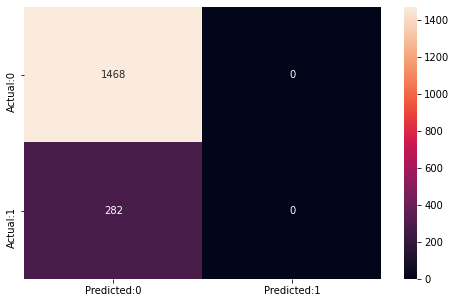

In [ ]:
y_pred1 = nn.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

print('',nn.evaluate(X_test, y_test))
print('',nn.evaluate(X_train_sampled, y_train_sampled))

cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')
#print(precision_score(y_test, y_pred, average='micro'))
#print(recall_score(y_test, y_pred, average='micro' ))
#print(f1_score(y_test, y_pred, average='micro'))

In [ ]:
from sklearn.ensemble import VotingClassifier

meta_model=VotingClassifier(estimators=[('Random Forest Tunned', rf_tunned), 
                                        ('Gradient Boosting Tunned',gb),
                                        ('Naive Bayes', nb),
                                        ('Bagging Classifier', bc),
                                        ('Ada Boost Classifier', ada)])

meta_model.fit(X_train_sampled,y_train_sampled)
print("The mean accuracy of the model is:", meta_model.score(X_test,y_test))

The mean accuracy of the model is: 0.8862857142857142


In [ ]:
print("The mean accuracy of the model is:", meta_model.score(X_train_sampled,y_train_sampled))

The mean accuracy of the model is: 0.923294480630785


The precision of the model is: 0.7836879432624113
The recall of the model is: 0.6155988857938719
The f1 score of the model is: 0.6895475819032761


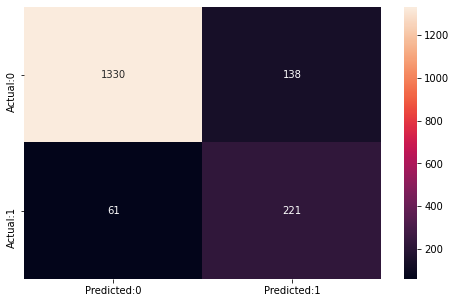

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred=(meta_model.predict(X_test))
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')
print("The precision of the model is:", precision_score(meta_model.predict(X_test), y_test))
print("The recall of the model is:", recall_score(meta_model.predict(X_test), y_test))
print("The f1 score of the model is:", f1_score(meta_model.predict(X_test), y_test))